In [1]:
%pylab inline
from __future__ import print_function
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [2]:
img= imread('/Users/alexisstorycrawshaw/Sepia-officinalis-skin_Roger-Hanlon.jpg')

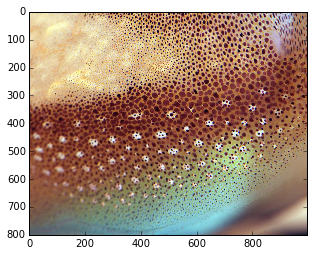

In [3]:
imshow(img)

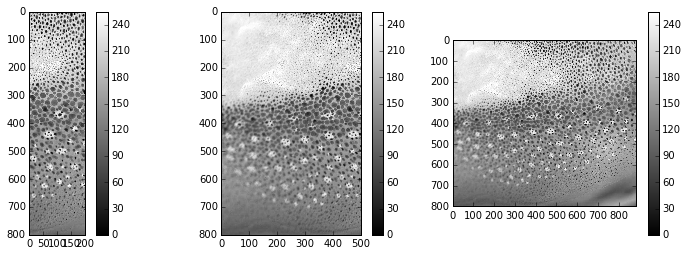

In [4]:
subplot(131)
imshow(img[:,400:600,0], cmap=cm.gray)
colorbar()
subplot(132)
imshow(img[:,:500,0], cmap=cm.gray)
colorbar()
subplot(133)
imshow(img[:,:-110,0], cmap=cm.gray)
colorbar()

gcf().set_figwidth(14)

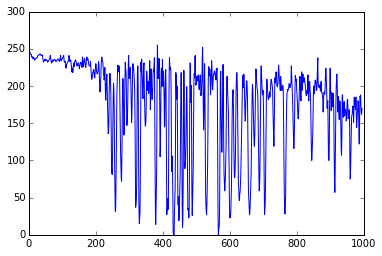

In [5]:
sigLine= img[1,:, 0]
plot(sigLine)

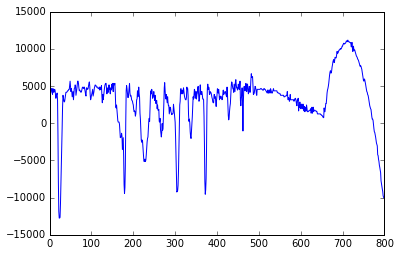

In [6]:
SigOut = array(((img[:,995,0].astype(int16)-127.5)*100).flat)
plot(SigOut)

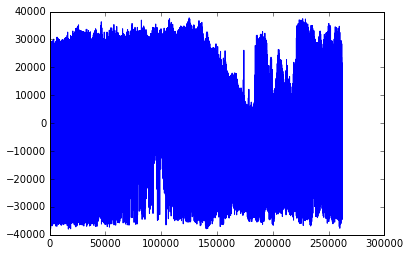

In [7]:
SigOut = array(((((img[:512,:512,0].astype(int16)/3)+(img[:512,:512,1].astype(int16)/3)+(img[:512,:512,2].astype(int16)/3))-127.5)*300).flat)
#SigOut = array(((img[:512,:512,0].astype(int16)-127.5)*200).flat)
plot(SigOut)

In [8]:
len(SigOut)

262144

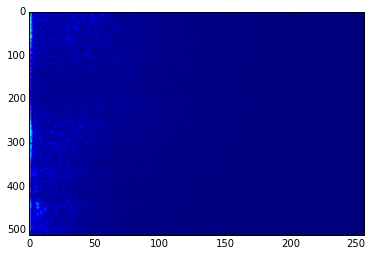

In [9]:
#win_start = arange(0, 796800, 996)
#win_len = 996
win_start = arange(0, (512*512), 512)
win_len = 512

mag_spectrum = []

for start in win_start:
    win = SigOut[start: start + win_len]
    X = fft.rfft(win)
    mag_spectrum.append(abs(X)/float(win_len/2))

imshow(mag_spectrum, aspect='auto')

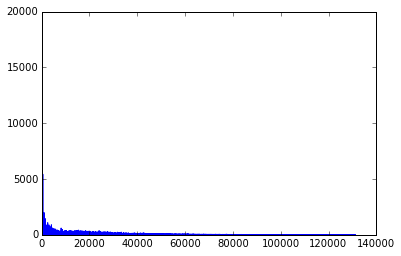

In [10]:
#N = (796800)
N=(512*512)
plot(abs(fft.rfft(SigOut))/ (N/2))

In [17]:
#win_start = arange(0, 796800, 996)
#win_len = 996
win_start = arange(0, (512*512), 512)
win_len = 512

mag_spectrum = []
real_spectrum= []
imag_spectrum= []
dft = []

for start in win_start:
    win = SigOut[start: start + win_len]
    X = fft.rfft(win)
    
    bin_phs = win
    fft_bin = complex(sum(x*cos(win)),
                     -sum(x*sin(win)))
    dft.append(win)

subplot(121)
plot(real(dft))
title('Real part')

subplot(122)
plot(imag(dft))
title('Imaginary part')

gcf().set_figwidth(10)
    
    
    
    
    mag_spectrum.append(abs(X)/float(win_len/2))
    
    real_spectrum.append(real(X)/float(win_len/2))
    imag_spectrum.append(imag(X)/float(win_len/2))

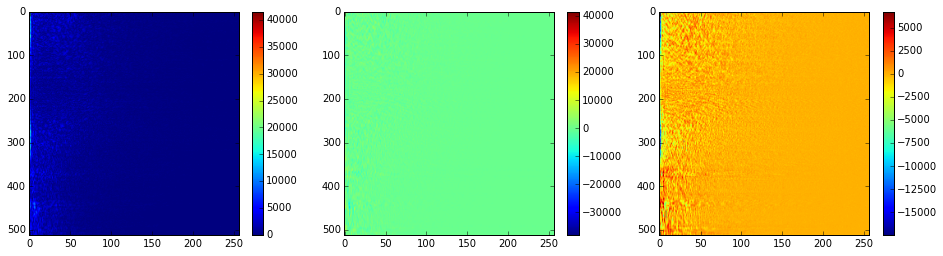

In [179]:
subplot(131)
imshow(mag_spectrum, aspect='auto')
colorbar()
subplot(132)
imshow(real_spectrum, aspect='auto')
colorbar()
subplot(133)
imshow(imag_spectrum, aspect='auto')
colorbar()

gcf().set_figwidth(16)

In [1]:
plot(real_spectrum);

NameError: name 'plot' is not defined

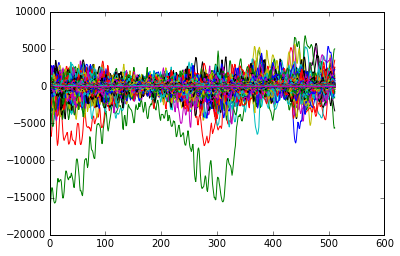

In [13]:
plot(imag_spectrum)

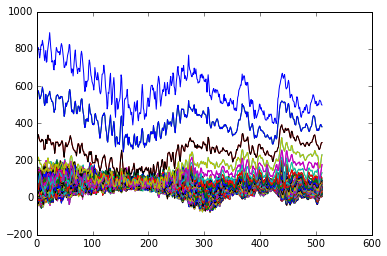

In [15]:
plot(fft.irfft(mag_spectrum))

In [21]:
from scipy.io import wavfile

newSig=[]

newSig=fft.irfft(mag_spectrum)
wavfile.write('chromatophore_test.wav', 44100, newSig)